<a href="https://colab.research.google.com/github/Sriva29/ml/blob/main/Srivatsan_Task6_Object_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
#importing the necessary
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import io

In [58]:
# Loading an image of a note I wrote with a pen cropped to 4:3
response = requests.get('https://github.com/Sriva29/ml/blob/fc1bc5b290bd1aed5a0502524a03262ce5d3b313/Image_1.jpg?raw=true')
image1_data = response.content
image1 = cv2.imdecode(np.frombuffer(image1_data, np.uint8), cv2.IMREAD_GRAYSCALE)

# Loading the second image of the pen that wrote the note (including its shadow)
response = requests.get('https://github.com/Sriva29/ml/raw/fc1bc5b290bd1aed5a0502524a03262ce5d3b313/Image_2.jpg')
image2_data = response.content
image2 = cv2.imdecode(np.frombuffer(image2_data, np.uint8), cv2.IMREAD_GRAYSCALE)


In [60]:
# Simple Thresholding
_, thresh_simple = cv2.threshold(image1, 127, 255, cv2.THRESH_BINARY)

# Otsu's Thresholding
_, thresh_otsu = cv2.threshold(
    image1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


In [61]:
# Adaptive Mean Thresholding
thresh_adaptive_mean = cv2.adaptiveThreshold(
    image2, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Adaptive Gaussian Thresholding
thresh_adaptive_gaussian = cv2.adaptiveThreshold(
    image2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)


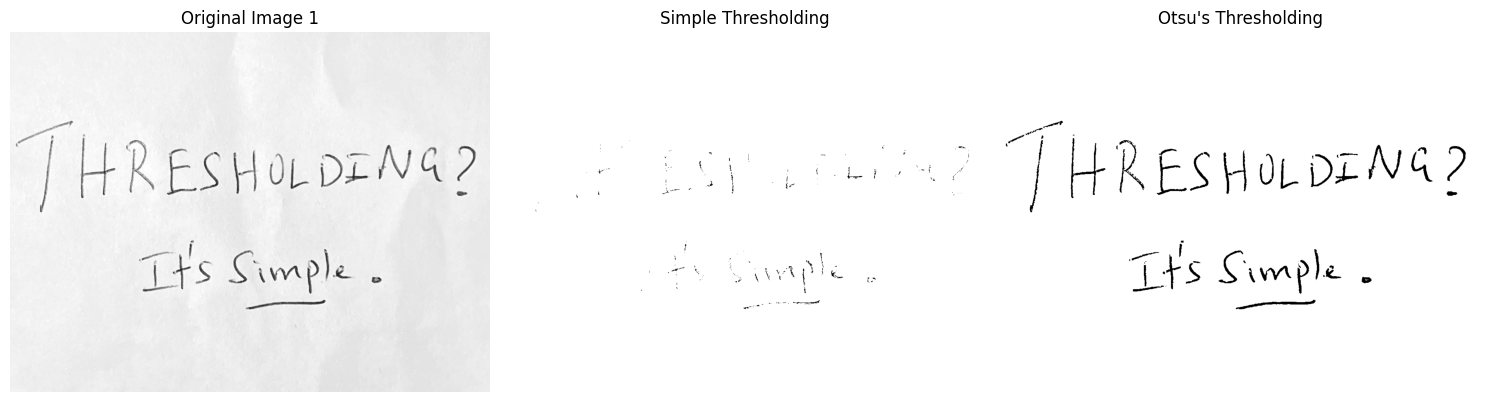

In [62]:
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(image1, cmap='gray')
plt.title('Original Image 1')
plt.axis('off')

# Simple Thresholding
plt.subplot(1, 3, 2)
plt.imshow(thresh_simple, cmap='gray')
plt.title('Simple Thresholding')
plt.axis('off')

# Otsu's Thresholding
plt.subplot(1, 3, 3)
plt.imshow(thresh_otsu, cmap='gray')
plt.title("Otsu's Thresholding")
plt.axis('off')

plt.tight_layout()
plt.show()


# Observation
When using Simple vs OTSU thresholding to segment a handwritten note, OTSU performs better. Possibly due to the fact that the pen I used creates rather thin lines and doesn't write evenly.

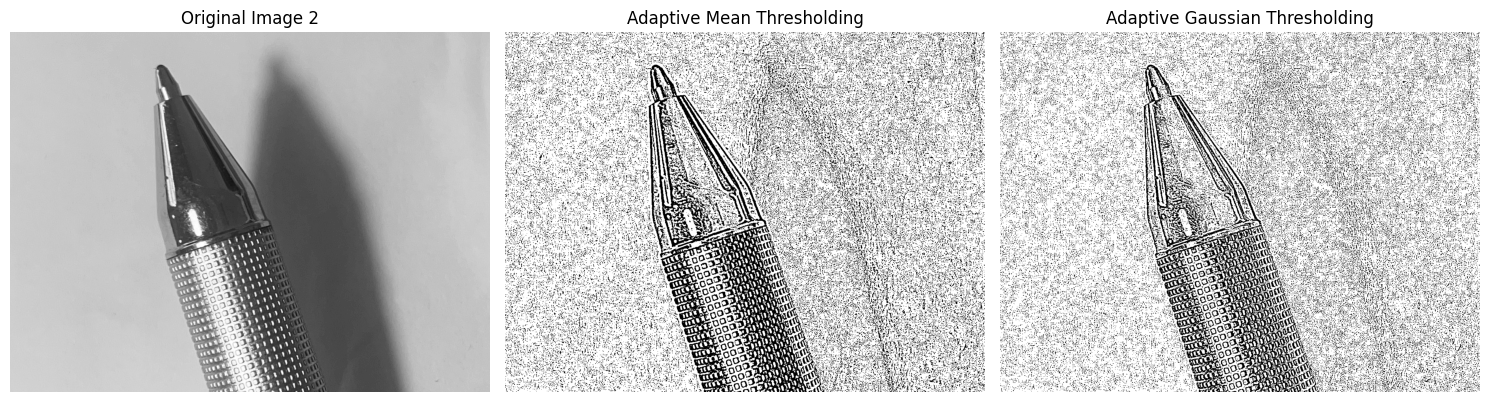

In [65]:
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(image2, cmap='gray')
plt.title('Original Image 2')
plt.axis('off')

# Adaptive Mean Thresholding
plt.subplot(1, 3, 2)
plt.imshow(thresh_adaptive_mean, cmap='gray')
plt.title('Adaptive Mean Thresholding')
plt.axis('off')

# Adaptive Gaussian Thresholding
plt.subplot(1, 3, 3)
plt.imshow(thresh_adaptive_gaussian, cmap='gray')
plt.title('Adaptive Gaussian Thresholding')
plt.axis('off')

plt.tight_layout()
plt.show()


# Observation
While the pen itself has been segmented, the shadow is not quite clear for both types of adaptive thresholding.